## Observations and Insights 

In [346]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

In [208]:
# Study data files
mouse_metadata_path = "C:\\Users\\maryk\\OneDrive\\Desktop\\Mouse_metadata.csv"
study_results_path = "C:\\Users\\maryk\\OneDrive\\Desktop\\Study_results.csv"

In [209]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [210]:
# Combine the data into a single dataset
combined_csv = pd.merge(mouse_metadata, study_results, how="inner", on="Mouse ID")

In [211]:
# Display the data table for preview
combined_csv

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [212]:
# Checking the number of mice.
mices = combined_csv['Mouse ID'].nunique()
mices

249

In [213]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_csv[combined_csv.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [214]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_id = combined_csv[combined_csv.duplicated(['Mouse ID'])]
duplicate_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [215]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = duplicate_id.drop_duplicates('Mouse ID')
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
21,x401,Capomulin,Female,16,15,5,45.473753,0
31,m601,Capomulin,Male,22,17,5,41.408591,1
41,g791,Ramicane,Male,11,16,5,45.851531,0
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1861,z435,Propriva,Female,12,26,5,47.115980,0
1864,z581,Infubinol,Female,24,25,5,49.273092,1
1874,z795,Naftisol,Female,13,29,5,46.833475,0


In [216]:
# Checking the number of mice in the clean DataFrame.
micess = clean_data['Mouse ID'].nunique()
micess

237

## Summary Statistics

In [217]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = combined_csv.groupby('Drug Regimen').mean()[('Tumor Volume (mm3)')]
mean



Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [218]:
median = combined_csv.groupby('Drug Regimen').median()[('Tumor Volume (mm3)')]
median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [219]:
variance = combined_csv.groupby('Drug Regimen').var()[('Tumor Volume (mm3)')]
variance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     42.351070
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [220]:
standard_dev = combined_csv.groupby('Drug Regimen').std()[('Tumor Volume (mm3)')]
standard_dev

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.507770
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [221]:
SEM = combined_csv.groupby('Drug Regimen').sem()[('Tumor Volume (mm3)')]
SEM

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.512884
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [222]:
summary_table = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dev, "SEM": SEM})
summary_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [223]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


single_df = combined_csv.groupby(['Drug Regimen']).agg('Tumor Volume (mm3)')
single_df

## Bar and Pie Charts

In [224]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints = combined_csv.groupby(["Timepoint"]).count()["Mouse ID"]
timepoints

Timepoint
0     250
5     238
10    223
15    207
20    195
25    183
30    171
35    154
40    142
45    130
Name: Mouse ID, dtype: int64

<AxesSubplot:xlabel='Timepoint'>

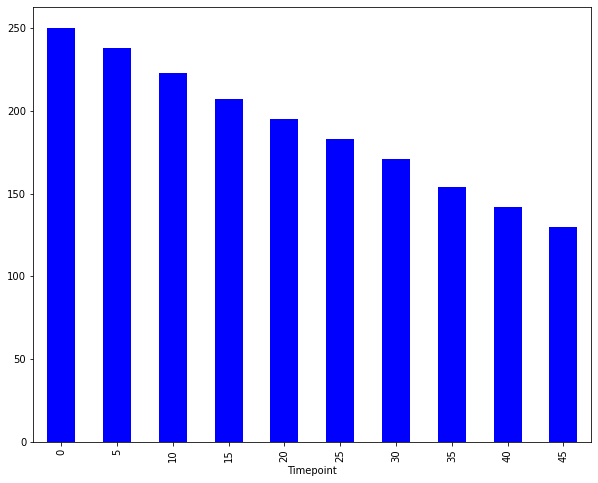

In [225]:
timepoints.plot(kind="bar", figsize=(10,8), color = "b")

In [226]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.


<BarContainer object of 10 artists>

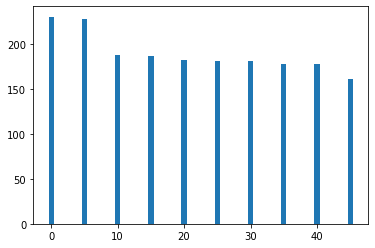

In [227]:
x_axis = combined_csv["Timepoint"].value_counts().index
y_axis = combined_csv["Drug Regimen"].value_counts()
plt.bar(x_axis, y_axis)

In [228]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender1 = combined_csv.groupby(["Sex"]).count()["Mouse ID"]
gender1

Sex
Female    935
Male      958
Name: Mouse ID, dtype: int64

<AxesSubplot:ylabel='Mouse ID'>

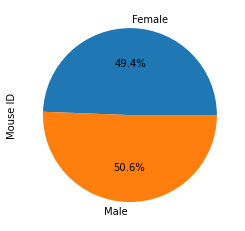

In [229]:
gender1.plot(kind="pie",autopct="%1.1f%%")

([<matplotlib.patches.Wedge at 0x1a92ea3c580>,
 [Text(-0.022618061157857323, 1.199786824110625, 'Male'),
  Text(0.020733222728035745, -1.099804588768073, 'Female')],
 [Text(-0.013193869008750105, 0.6998756473978645, '50.6%'),
  Text(0.011309030578928589, -0.5998934120553124, '49.4%')])

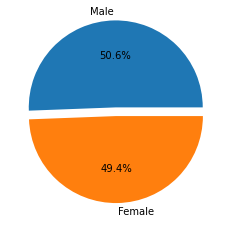

In [230]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Male","Female"]
wedge = [50.6,49.4]
explode = (0.1,0)
plt.pie(wedge, explode=explode, labels=labels,autopct="%1.1f%%")

## Quartiles, Outliers and Boxplots

In [231]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [232]:
tumors = combined_csv.groupby(combined_csv['Mouse ID']).agg({'Timepoint':['max']})
tumors

,Timepoint
,max
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30
...,...
z435,10
z578,45


In [255]:
combined_csv.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [256]:
capomulin = combined_csv.loc[combined_csv["Drug Regimen"] == "Capomulin",:]
capomulin

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [257]:
capomulinx = combined_csv.groupby('Mouse ID').max()['Timepoint']
capomulinx

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 249, dtype: int64

In [258]:
quartiles = capomulinx.quantile([.25,.5,.75])
lowq = quartiles[0.25]
highq = quartiles[0.75]
iqr = upperq-lowerq
low_bound = lowq - (1.5*iqr)
high_bound = highq + (1.5*iqr)

In [259]:
print(f"For Capomulin:")
print(f"The low quartile is: {lowq}.")
print(f"The high quartile is: {highq}.")
print(f"The iqr quartile is: {iqr}.")
print(f"Those with values beow {low_bound} could be outliers.")
print(f"Those with values above {high_bound} could be outliers.")

For Capomulin:
The low quartile is: 20.0.
The high quartile is: 45.0.
The iqr quartile is: 25.0.
Those with values beow -17.5 could be outliers.
Those with values above 82.5 could be outliers.


In [260]:
ramicane = combined_csv.loc[combined_csv["Drug Regimen"] == "Ramicane",:]
ramicane

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
449,w678,Ramicane,Female,5,24,5,43.166373,0
450,y449,Ramicane,Male,19,24,0,45.000000,0
451,y449,Ramicane,Male,19,24,5,45.877545,0
452,y449,Ramicane,Male,19,24,10,46.378092,0


In [261]:
ramicanex = combined_csv.groupby('Mouse ID').max()['Timepoint']
ramicanex

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 249, dtype: int64

In [262]:
quartiles = ramicanex.quantile([.25,.5,.75])
lowq = quartiles[0.25]
highq = quartiles[0.75]
iqr = upperq-lowerq
low_bound = lowq - (1.5*iqr)
high_bound = highq + (1.5*iqr)

In [263]:
print(f"For Ramicane:")
print(f"The low quartile is: {lowq}.")
print(f"The high quartile is: {highq}.")
print(f"The iqr quartile is: {iqr}.")
print(f"Those with values beow {low_bound} could be outliers.")
print(f"Those with values above {high_bound} could be outliers.")

For Ramicane:
The low quartile is: 20.0.
The high quartile is: 45.0.
The iqr quartile is: 25.0.
Those with values beow -17.5 could be outliers.
Those with values above 82.5 could be outliers.


In [264]:
infubinol = combined_csv.loc[combined_csv["Drug Regimen"] == "Infubinol",:]
infubinol

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.000000,0
455,a203,Infubinol,Female,20,23,5,48.508468,0
456,a203,Infubinol,Female,20,23,10,51.852437,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [265]:
infubinolx = combined_csv.groupby('Mouse ID').max()['Timepoint']
infubinolx

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 249, dtype: int64

In [266]:
quartiles = infubinolx.quantile([.25,.5,.75])
lowq = quartiles[0.25]
highq = quartiles[0.75]
iqr = upperq-lowerq
low_bound = lowq - (1.5*iqr)
high_bound = highq + (1.5*iqr)

In [267]:
print(f"For Infubinol:")
print(f"The low quartile is: {lowq}.")
print(f"The high quartile is: {highq}.")
print(f"The iqr quartile is: {iqr}.")
print(f"Those with values beow {low_bound} could be outliers.")
print(f"Those with values above {high_bound} could be outliers.")

For Infubinol:
The low quartile is: 20.0.
The high quartile is: 45.0.
The iqr quartile is: 25.0.
Those with values beow -17.5 could be outliers.
Those with values above 82.5 could be outliers.


In [268]:
ceftamin = combined_csv.loc[combined_csv["Drug Regimen"] == "Ceftamin",:]
ceftamin

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
484,a275,Ceftamin,Female,20,28,0,45.000000,0
485,a275,Ceftamin,Female,20,28,5,46.795257,0
486,a275,Ceftamin,Female,20,28,10,47.371343,0
487,a275,Ceftamin,Female,20,28,15,49.734404,0
488,a275,Ceftamin,Female,20,28,20,50.513437,1
...,...,...,...,...,...,...,...,...
1851,y865,Ceftamin,Male,23,26,25,57.173538,2
1852,y865,Ceftamin,Male,23,26,30,59.033275,3
1853,y865,Ceftamin,Male,23,26,35,61.153140,3
1854,y865,Ceftamin,Male,23,26,40,63.469549,3


In [269]:
ceftaminx = combined_csv.groupby('Mouse ID').max()['Timepoint']
ceftaminx

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 249, dtype: int64

In [270]:
quartiles = ceftaminx.quantile([.25,.5,.75])
lowq = quartiles[0.25]
highq = quartiles[0.75]
iqr = upperq-lowerq
low_bound = lowq - (1.5*iqr)
high_bound = highq + (1.5*iqr)

In [271]:
print(f"For Ceftamin:")
print(f"The low quartile is: {lowq}.")
print(f"The high quartile is: {highq}.")
print(f"The iqr quartile is: {iqr}.")
print(f"Those with values beow {low_bound} could be outliers.")
print(f"Those with values above {high_bound} could be outliers.")

For Ceftamin:
The low quartile is: 20.0.
The high quartile is: 45.0.
The iqr quartile is: 25.0.
Those with values beow -17.5 could be outliers.
Those with values above 82.5 could be outliers.


In [149]:
top_four = combined_csv.loc[(combined_csv["Drug Regimen"] == "Capomulin") | (combined_csv["Drug Regimen"] == "Ramicanex") | (combined_csv["Drug Regimen"] == "Infubinolx") | (combined_csv["Drug Regimen"] == "Ceftaminx")]
top_four

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [159]:
top_four_sort = top_four.sort_values("Timepoint", ascending = False)
top_four_sort


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
134,r554,Capomulin,Female,8,17,45,32.377357,3
224,w914,Capomulin,Male,24,21,45,36.041047,2
360,g316,Capomulin,Female,22,22,45,40.159220,2
39,m601,Capomulin,Male,22,17,45,28.430964,1
104,u364,Capomulin,Male,18,17,45,31.023923,3
...,...,...,...,...,...,...,...,...
338,w150,Capomulin,Male,23,23,0,45.000000,0
341,v923,Capomulin,Female,19,21,0,45.000000,0
351,g316,Capomulin,Female,22,22,0,45.000000,0
361,s710,Capomulin,Female,1,23,0,45.000000,0


In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


In [310]:
data_to_plot = [capomulinx, ramicanex, infubinolx, ceftaminx]

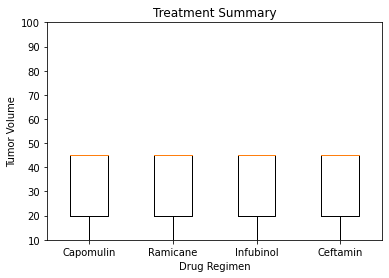

In [322]:
fig1, ax1 = plt.subplots()
ax1.set_title('Treatment Summary')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Tumor Volume')
plt.ylim(10,100)
ax1.boxplot(data_to_plot, labels=["Capomulin","Ramicane","Infubinol","Ceftamin"])
plt.savefig("treatment_box_plot")
plt.show()


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [321]:
tumor_time = combined_csv[combined_csv["Mouse ID"].isin(["f966"])]
tumor_time

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
60,f966,Capomulin,Male,16,17,0,45.000000,0
61,f966,Capomulin,Male,16,17,5,38.796474,0
62,f966,Capomulin,Male,16,17,10,35.624403,0
63,f966,Capomulin,Male,16,17,15,32.623003,0
64,f966,Capomulin,Male,16,17,20,30.485985,0


In [ ]:
x_axis = tumor_time["Tumor Volume (mm3)"]
y_axis = tumor_time["Timepoint"]

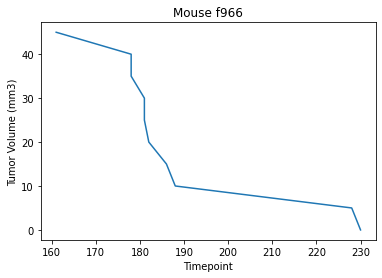

In [327]:
plt.title("Mouse f966")
plt.plot(y_axis,x_axis)
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint")
plt.savefig("mouse_line_plot")
plt.show()


In [331]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


<function matplotlib.pyplot.show(close=None, block=None)>

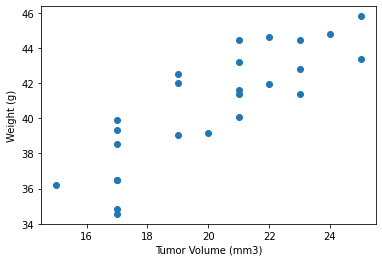

In [342]:
tumor_av = top_four.groupby(['Mouse ID']).mean()
plt.scatter(tumor_av['Weight (g)'],tumor_av['Tumor Volume (mm3)'])

plt.ylabel('Weight (g)')
plt.xlabel('Tumor Volume (mm3)')
plt.savefig('Mouse_Scatter')
plt.show

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [398]:
corr=round(st.pearsonr(top_four['Weight (g)'],top_four['Tumor Volume (mm3)'])[0],2)
corr

0.53

In [404]:
line=st.linregress(top_four['Weight (g)'],top_four['Tumor Volume (mm3)'])
line

LinregressResult(slope=0.9609669432428346, intercept=21.489827213299584, rvalue=0.5256995552077166, pvalue=9.605446629502282e-18, stderr=0.10298279892023657, intercept_stderr=2.075157005491298)

In [412]:
slope=0.9609669432428346
intercept=21.489827213299584

<function matplotlib.pyplot.show(close=None, block=None)>

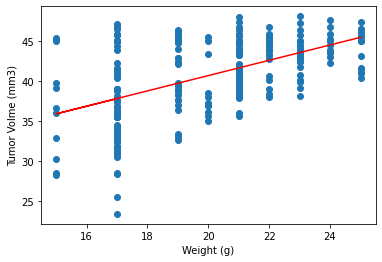

In [413]:
y_value=top_four['Weight (g)']*slope+intercept
plt.scatter(top_four['Weight (g)'],top_four['Tumor Volume (mm3)'])
plt.plot(top_four['Weight (g)'],y_value,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volme (mm3)')
plt.savefig('scatterline')
plt.show